>Project 2

# Uploading data 

In [571]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [572]:
ls

 bank-additional.csv
 bank-additional-full.csv
 bank-additional-names.txt
 bank.csv
'Copia de Marketing Campaign_Retail Bank_Telemarketing.ipynb'
 COPYbank.csv
'Copy of WORKING-WELL-Copia de Marketing Campaign_Retail Bank_Telemarketing.ipynb'
 DataFiles/
 Distrubution-age-duration.png
'Ising2DFM_reSample_L40_T=All_labels.pkl'
'Ising2DFM_reSample_L40_T=All.pkl'
 IsingData.zip
 NB12_CIX-DNN_ising_TFlow.ipynb
 P2-anl1.ipynb
 P2.ipynb
 Results/
'Untitled spreadsheet.gsheet'
'WORKING-WELL-Copia de Marketing Campaign_Retail Bank_Telemarketing.ipynb'


In [573]:
cd drive/'My Drive'/'Colab Notebooks'/MLP2/

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/MLP2/'
/content/drive/My Drive/Colab Notebooks/MLP2


In [574]:
ls

 bank-additional.csv
 bank-additional-full.csv
 bank-additional-names.txt
 bank.csv
'Copia de Marketing Campaign_Retail Bank_Telemarketing.ipynb'
 COPYbank.csv
'Copy of WORKING-WELL-Copia de Marketing Campaign_Retail Bank_Telemarketing.ipynb'
 DataFiles/
 Distrubution-age-duration.png
'Ising2DFM_reSample_L40_T=All_labels.pkl'
'Ising2DFM_reSample_L40_T=All.pkl'
 IsingData.zip
 NB12_CIX-DNN_ising_TFlow.ipynb
 P2-anl1.ipynb
 P2.ipynb
 Results/
'Untitled spreadsheet.gsheet'
'WORKING-WELL-Copia de Marketing Campaign_Retail Bank_Telemarketing.ipynb'


# Data Frame 

In [575]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

print("--1--data")
linkname = 'bank-additional-full.csv'
print("--1.2-read file")
dataset1 = pd.read_csv(linkname, sep = ';')
print("--1.2.2--readed")

# View the first 5 rows in the dataset
print(dataset1.shape)
display(dataset1.head(70))


--1--data
--1.2-read file
--1.2.2--readed
(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,37,admin.,married,university.degree,no,no,no,telephone,may,mon,232,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
66,44,blue-collar,single,basic.9y,no,yes,no,telephone,may,mon,91,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
67,33,admin.,married,unknown,no,yes,no,telephone,may,mon,273,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
68,56,admin.,married,basic.9y,no,yes,no,telephone,may,mon,158,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Raw plots

## Visual1


*


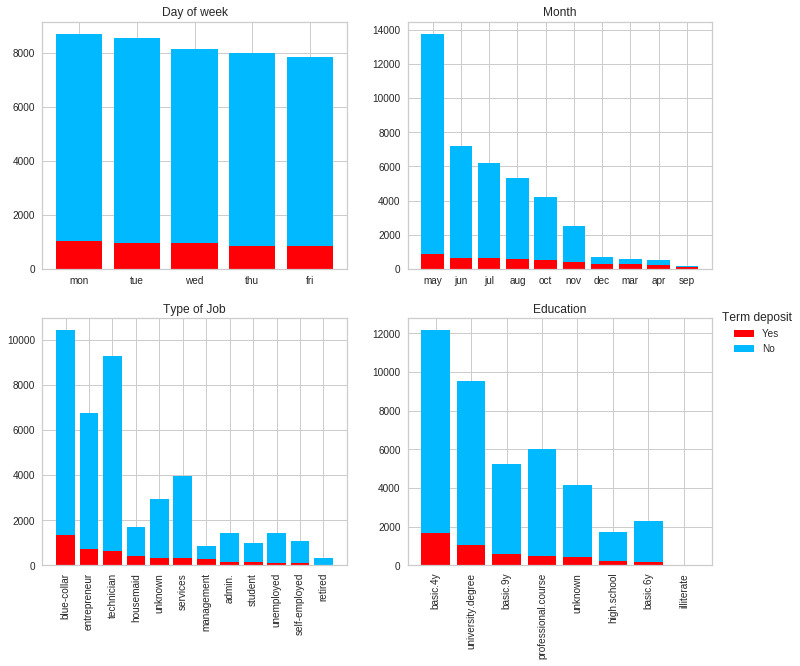

(41188, 21)


In [576]:
data1 = dataset1[dataset1['y'] == 'yes']
data2 = dataset1[dataset1['y'] == 'no']
print("*")


fig, ax = plt.subplots(2, 2, figsize=(12,10))
b1 = ax[0, 0].bar(data1['day_of_week'].unique(),height = data1['day_of_week'].value_counts(),color='#FF0006')
b2 = ax[0, 0].bar(data2['day_of_week'].unique(),height = data2['day_of_week'].value_counts(),bottom = data1['day_of_week'].value_counts(),color = '#00B9FF') 
ax[0, 0].title.set_text('Day of week')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(data1['month'].unique(),height = data1['month'].value_counts(),color='#FF0006')
ax[0, 1].bar(data2['month'].unique(),height = data2['month'].value_counts(),bottom = data1['month'].value_counts(),color = '#00B9FF') 
ax[0, 1].title.set_text('Month')
ax[1, 0].bar(data1['job'].unique(),height = data1['job'].value_counts(),color='#FF0006')
ax[1, 0].bar(data1['job'].unique(),height = data2['job'].value_counts()[data1['job'].value_counts().index],bottom = data1['job'].value_counts(),color = '#00B9FF') 
ax[1, 0].title.set_text('Type of Job')
ax[1, 0].tick_params(axis='x',rotation=90)
ax[1, 1].bar(data1['education'].unique(),height = data1['education'].value_counts(),color='#FF0006') #row=0, col=1
ax[1, 1].bar(data1['education'].unique(),height = data2['education'].value_counts()[data1['education'].value_counts().index],bottom = data1['education'].value_counts(),color = '#00B9FF') 
ax[1, 1].title.set_text('Education')
ax[1, 1].tick_params(axis='x',rotation=90)
#ax[0, 1].xticks(rotation=90)
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")

save_fig('DataVisual-dow_mth_job_edu')

plt.show()

print(dataset1.shape)

## Visual 2 

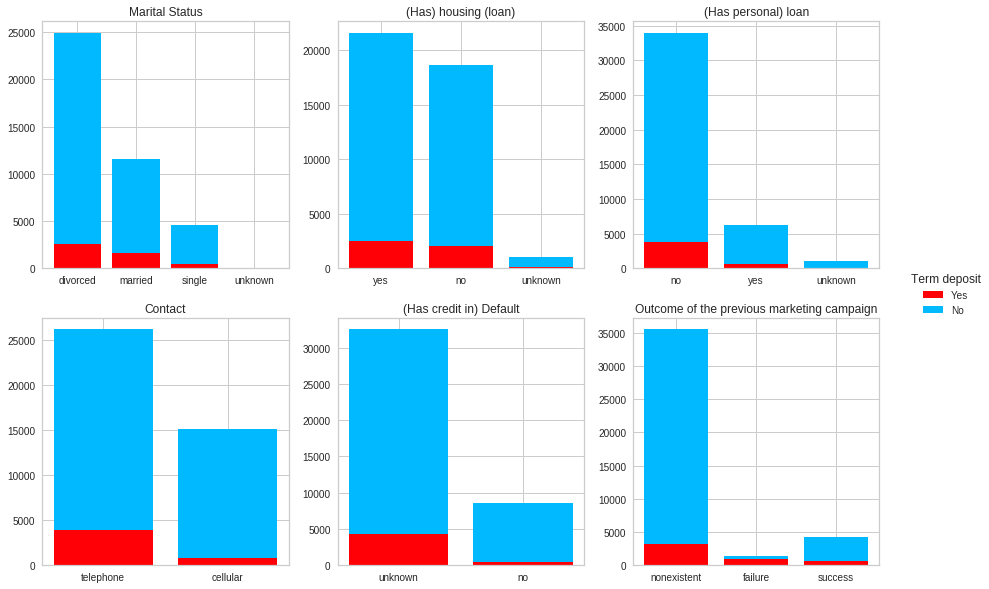

(41188, 21)


In [577]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

b1 = ax[0, 0].bar(data1['marital'].unique(),height = data1['marital'].value_counts(),color='#FF0006')
b2 = ax[0, 0].bar(data1['marital'].unique(),height = data2['marital'].value_counts()[data1['marital'].value_counts().index],bottom = data1['marital'].value_counts(),color = '#00B9FF') 
ax[0, 0].title.set_text('Marital Status')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(data1['housing'].unique(),height = data1['housing'].value_counts(),color='#FF0006')
ax[0, 1].bar(data1['housing'].unique(),height = data2['housing'].value_counts()[data1['housing'].value_counts().index],bottom = data1['housing'].value_counts(),color = '#00B9FF') 
ax[0, 1].title.set_text('(Has) housing (loan)')
ax[0, 2].bar(data1['loan'].unique(),height = data1['loan'].value_counts(),color='#FF0006')
ax[0, 2].bar(data1['loan'].unique(),height = data2['loan'].value_counts()[data1['loan'].value_counts().index],bottom = data1['loan'].value_counts(),color = '#00B9FF') 
ax[0, 2].title.set_text('(Has personal) loan')
ax[1, 0].bar(data1['contact'].unique(),height = data1['contact'].value_counts(),color='#FF0006')
ax[1, 0].bar(data1['contact'].unique(),height = data2['contact'].value_counts()[data1['contact'].value_counts().index],bottom = data1['contact'].value_counts(),color = '#00B9FF') 
ax[1, 0].title.set_text('Contact')
ax[1, 1].bar(data1['default'].unique(),height = data1['default'].value_counts(),color='#FF0006')
ax[1, 1].bar(data1['default'].unique(),height = data2['default'].value_counts()[data1['default'].value_counts().index],bottom = data1['default'].value_counts(),color = '#00B9FF') 
ax[1, 1].title.set_text('(Has credit in) Default')
ax[1, 2].bar(data1['poutcome'].unique(),height = data1['poutcome'].value_counts(),color='#FF0006')
ax[1, 2].bar(data1['poutcome'].unique(),height = data2['poutcome'].value_counts()[data1['poutcome'].value_counts().index],bottom = data1['poutcome'].value_counts(),color = '#00B9FF') 
ax[1, 2].title.set_text('Outcome of the previous marketing campaign')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")

save_fig('DataVisual-marit_hous_loan_tcont_def_prevmc')

plt.show()

print(dataset1.shape)



## Visual with %

### Week

+a
++a


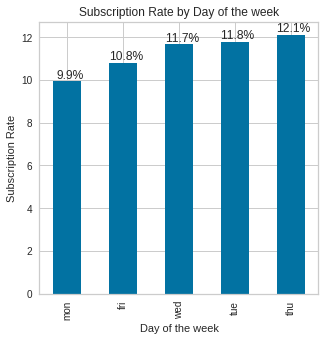

(41188, 21)


In [578]:
count_day_of_week_response_pct = pd.crosstab(dataset1['y'],dataset1['day_of_week']).apply(lambda x: x/x.sum() * 100)
count_day_of_week_response_pct = count_day_of_week_response_pct.transpose()
print("+a")
plot_day_of_the_week = count_day_of_week_response_pct['yes'].sort_values(ascending = True).plot(kind ='bar',
                                                                           figsize = (5,5))                                                  
plt.title('Subscription Rate by Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Subscription Rate')
# Label each bar
for rec, label in zip(plot_day_of_the_week.patches,
                      count_day_of_week_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_day_of_the_week.text(rec.get_y() + rec.get_x() + 0.3,#rec.get_width(), #x,y,s ORDER of entries
                  rec.get_height() + rec.get_y(),#rec.get_y()+ rec.get_height(), 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')
print("++a")


save_fig('DataVisual-Sr_week')

plt.show()

print(dataset1.shape)

### Month

+b
++b


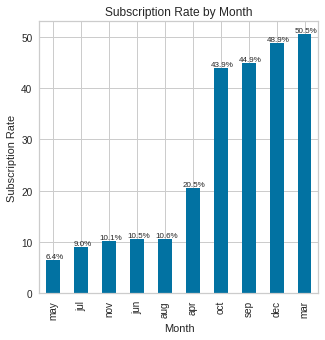

(41188, 21)


In [579]:
count_month_response_pct = pd.crosstab(dataset1['y'],dataset1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
print("+b")
plot_month = count_month_response_pct['yes'].sort_values(ascending = True).plot(kind ='bar',
                                                                           figsize = (5,5))
plt.title('Subscription Rate by Month')
plt.xlabel('Month')
plt.ylabel('Subscription Rate')
# Label each bar
for rec, label in zip(plot_month.patches,
                      count_month_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_month.text(rec.get_y() + rec.get_x() + 0.3,
                  rec.get_height() + rec.get_y(),
                  label+'%', fontsize=8, 
                  ha = 'center', 
                  va='bottom')
print("++b")

save_fig('DataVisual-Sr_month')

plt.show()

print(dataset1.shape)

### Job

+c
++c


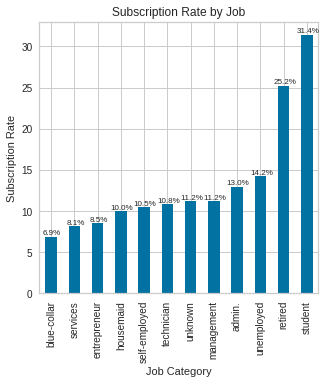

(41188, 21)


In [580]:
count_job_response_pct = pd.crosstab(dataset1['y'],dataset1['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()
print("+c")

plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='bar',
                                                                           figsize = (5,5))
plt.title('Subscription Rate by Job')
plt.ylabel('Subscription Rate')
plt.xlabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_y() + rec.get_x() + 0.3,
                  rec.get_height() + rec.get_y(), 
                  label+'%', fontsize=8,
                  ha = 'center', 
                  va='bottom')

print("++c")
save_fig('DataVisual-Sr_job')

plt.show()

print(dataset1.shape)

### Edu

+d
++d


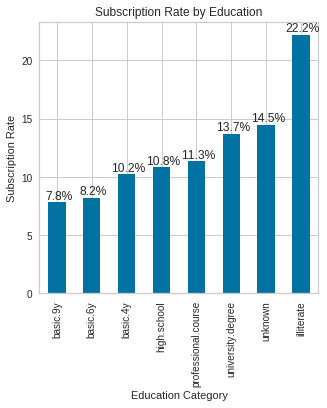

(41188, 21)


In [581]:
count_education_response_pct = pd.crosstab(dataset1['y'],dataset1['education']).apply(lambda x: x/x.sum() * 100)
count_education_response_pct = count_education_response_pct.transpose()
print("+d")
plot_education = count_education_response_pct['yes'].sort_values(ascending = True).plot(kind ='bar',
                                                                           figsize = (5,5))
plt.title('Subscription Rate by Education')
plt.ylabel('Subscription Rate')
plt.xlabel('Education Category')

# Label each bar
for rec, label in zip(plot_education.patches,
                      count_education_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_education.text(rec.get_y() + rec.get_x() + 0.3,
                  rec.get_height() + rec.get_y(),
                  label+'%',
                  ha = 'center', 
                  va='bottom')

print("++d")

save_fig('DataVisual-Sr_edu')

plt.show()

print(dataset1.shape)

### Mari

+
++


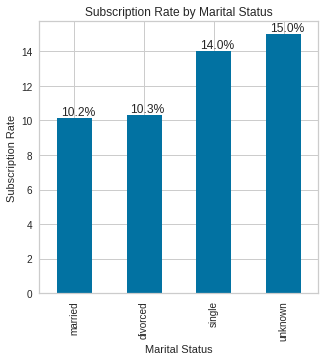

(41188, 21)


In [582]:
count_marital_response_pct = pd.crosstab(dataset1['y'],dataset1['marital']).apply(lambda x: x/x.sum() * 100)
count_marital_response_pct = count_marital_response_pct.transpose()
print("+")

plot_marital = count_marital_response_pct['yes'].sort_values(ascending = True).plot(kind ='bar',
                                                                           figsize = (5,5))
                                                                               
plt.title('Subscription Rate by Marital Status')
plt.ylabel('Subscription Rate')
plt.xlabel('Marital Status')

# Label each bar
for rec, label in zip(plot_marital.patches,
                      count_marital_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_marital.text(rec.get_y() + rec.get_x() + 0.3,
                  rec.get_height() + rec.get_y(),
                  label+'%',
                  ha = 'center', 
                  va='bottom')

print("++")

save_fig('DataVisual-Sr_marital')

plt.show()

print(dataset1.shape)

### Housing

+1
++1


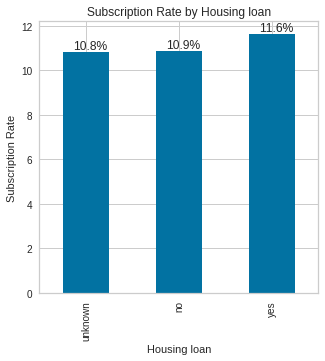

(41188, 21)


In [583]:
count_housing_response_pct = pd.crosstab(dataset1['y'],dataset1['housing']).apply(lambda x: x/x.sum() * 100)
count_housing_response_pct = count_housing_response_pct.transpose()
print("+1")

plot_housing = count_housing_response_pct['yes'].sort_values(ascending = True).plot(kind ='bar',
                                                                           figsize = (5,5))
                                                                               
plt.title('Subscription Rate by Housing loan')
plt.ylabel('Subscription Rate')
plt.xlabel('Housing loan')

# Label each bar
for rec, label in zip(plot_housing.patches,
                      count_housing_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_housing.text(rec.get_y() + rec.get_x() + 0.3,
                  rec.get_height() + rec.get_y(),
                  label+'%',
                  ha = 'center', 
                  va='bottom')

print("++1")
save_fig('DataVisual-Sr_housing')

plt.show()

print(dataset1.shape)


### Loan

+2
++2


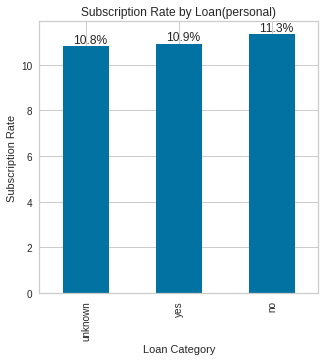

(41188, 21)


In [584]:
count_loan_response_pct = pd.crosstab(dataset1['y'],dataset1['loan']).apply(lambda x: x/x.sum() * 100)
count_loan_response_pct = count_loan_response_pct.transpose()
print("+2")

plot_loan = count_loan_response_pct['yes'].sort_values(ascending = True).plot(kind ='bar',
                                                                           figsize = (5,5))
                                                                               
plt.title('Subscription Rate by Loan(personal)')
plt.ylabel('Subscription Rate')
plt.xlabel('Loan Category')

# Label each bar
for rec, label in zip(plot_loan.patches,
                      count_loan_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_loan.text(rec.get_y() + rec.get_x() + 0.3,
                  rec.get_height() + rec.get_y(),
                  label+'%',
                  ha = 'center', 
                  va='bottom')

print("++2")
save_fig('DataVisual-Sr_loan')

plt.show()

print(dataset1.shape)

### Contact

+3
++3


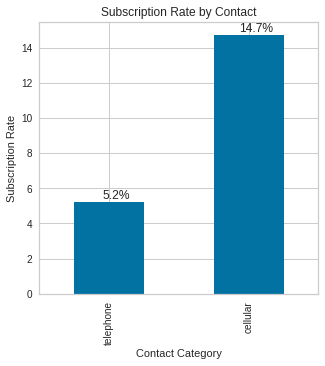

(41188, 21)


In [585]:
count_contact_response_pct = pd.crosstab(dataset1['y'],dataset1['contact']).apply(lambda x: x/x.sum() * 100)
count_contact_response_pct = count_contact_response_pct.transpose()
print("+3")

plot_contact = count_contact_response_pct['yes'].sort_values(ascending = True).plot(kind ='bar',
                                                                           figsize = (5,5))
                                                                               
plt.title('Subscription Rate by Contact')
plt.ylabel('Subscription Rate')
plt.xlabel('Contact Category')

# Label each bar
for rec, label in zip(plot_contact.patches,
                      count_contact_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_contact.text(rec.get_y() + rec.get_x() + 0.3,
                  rec.get_height() + rec.get_y(),
                  label+'%',
                  ha = 'center', 
                  va='bottom')

print("++3")
save_fig('DataVisual-Sr_contact')

plt.show()

print(dataset1.shape)

### Defa

+4
++4


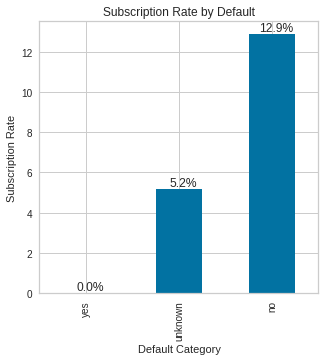

(41188, 21)


In [586]:
count_default_response_pct = pd.crosstab(dataset1['y'],dataset1['default']).apply(lambda x: x/x.sum() * 100)
count_default_response_pct = count_default_response_pct.transpose()
print("+4")
plot_default = count_default_response_pct['yes'].sort_values(ascending = True).plot(kind ='bar',
                                                                           figsize = (5,5))
plt.title('Subscription Rate by Default')
plt.ylabel('Subscription Rate')
plt.xlabel('Default Category')
# Label each bar
for rec, label in zip(plot_default.patches,
                      count_default_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_default.text(rec.get_y() + rec.get_x() + 0.3,
                  rec.get_height() + rec.get_y(),
                  label+'%',
                  ha = 'center', 
                  va='bottom')
print("++4")
save_fig('DataVisual-Sr_default')

plt.show()

print(dataset1.shape)

### Poutc

+5
++5


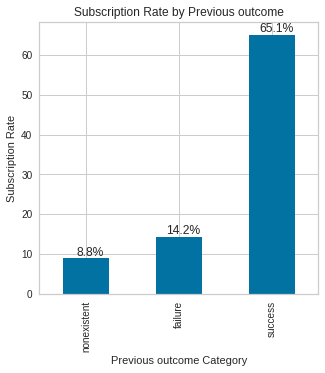

(41188, 21)


In [587]:
count_poutcome_response_pct = pd.crosstab(dataset1['y'],dataset1['poutcome']).apply(lambda x: x/x.sum() * 100)
count_poutcome_response_pct = count_poutcome_response_pct.transpose()
print("+5")
plot_poutcome = count_poutcome_response_pct['yes'].sort_values(ascending = True).plot(kind ='bar',
                                                                           figsize = (5,5))
plt.title('Subscription Rate by Previous outcome')
plt.ylabel('Subscription Rate')
plt.xlabel('Previous outcome Category')

# Label each bar
for rec, label in zip(plot_poutcome.patches,
                      count_poutcome_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_poutcome.text(rec.get_y() + rec.get_x() + 0.3,
                  rec.get_height() + rec.get_y(),
                  label+'%',
                  ha = 'center', 
                  va='bottom')

print("++5")
save_fig('DataVisual-Sr_poutcome')

plt.show()

print(dataset1.shape)

# CLEANING

In [588]:
#################
print("--2Clean")
# Step 1: Delete the rows which column 'poutcome' contains 'other'
condition0 = dataset1.poutcome == 'other'
#print("--2.1")
#print("--2.1.2 dataset2")
datasetcondition0 = dataset1.drop(dataset1[condition0].index, axis = 0, inplace = False)
#Does not affect the data _?

#Delete the rows with 'unknown' in marital housing and loan
condition0 = datasetcondition0.marital == 'unknown'
dataset02 = datasetcondition0.drop(datasetcondition0[condition0].index, axis = 0, inplace = False)

condition00 = dataset02.housing == 'unknown'
dataset5 = dataset02.drop(dataset02[condition00].index, axis = 0, inplace = False)

#condition000 = dataset002.loan == 'unknown'
#dataset0002 = dataset002.drop(dataset002[condition000].index, axis = 0, inplace = False)

# We found out an "unknown" in edu
#condition0000 = dataset0002.education == 'unknown'
#dataset5 = dataset0002.drop(dataset0002[condition0000].index, axis = 0, inplace = False)

#erase calls with duration 0
#condition000 = dataset002.loan == 'unknown'
#dataset2 = dataset002.drop(dataset002[condition000].index, axis = 0, inplace = False)

#print("--2.1")
#print("--2.1.2 dataset2")
#display(dataset2.head())
# Step 2: Replace 'unknown' in default housing and loan with 'other'
#print("--2.1.3 to replace")

dataset5['loan'] = dataset5['loan'].replace(['unknown'],'no')
#print("--2.1.4 replaced")

print(dataset5.shape)
display(dataset5.head(70))



--2Clean
(40119, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,33,admin.,married,unknown,no,yes,no,telephone,may,mon,273,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
68,56,admin.,married,basic.9y,no,yes,no,telephone,may,mon,158,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
69,44,blue-collar,single,basic.4y,unknown,yes,yes,telephone,may,mon,177,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
70,41,management,married,basic.6y,no,no,no,telephone,may,mon,200,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
# Step 2: Replace 'unknown' in default housing and loan with 'other'
#print("--2.1.3 to replace")

#dataset2[['job','education',]] = dataset2[['job','education']].replace(['unknown'],'other')
#print("--2.1.4 replaced")

In [0]:
############################ 2.2 Drop outliers in the column 'balance
#from scipy.stats import zscore
#dataset2[['balance']].mean()
#dataset2[['balance']].mean()
#dataset2['balance_outliers'] = dataset2['balance']
#dataset2['balance_outliers']= zscore(dataset2['balance_outliers'])
#condition1 = (dataset2['balance_outliers']>3) | (dataset2['balance_outliers']<-3 )
#dataset3 = dataset2.drop(dataset2[condition1].index, axis = 0, inplace = False)
#dataset4 = dataset3.drop('balance_outliers', axis=1)

## Transform to response_binary

In [591]:
############################## 2.3 Creating and transforming data
# Step 1: Change column name: 'y' to 'response'
#dataset4.rename(index=str, columns={'y': 'response'}, inplace = True)
#dataset2.rename(index=str, columns={'y': 'response'}, inplace = True)
dataset5.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(dataset5, new_column, old_column):
    dataset5[new_column] = dataset5[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return dataset5[new_column].value_counts()
#To appreciate the change when displaying the table 22 col
convert(dataset5, "response_binary", "response")
#convert(dataset5, "response", "response")
print("-----2.3.1")

print(dataset5.shape)
display(dataset5.head(150))


-----2.3.1
(40119, 22)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,response_binary
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,40,admin.,married,university.degree,unknown,yes,no,telephone,may,mon,163,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
149,51,blue-collar,married,basic.4y,no,yes,no,telephone,may,mon,87,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
150,60,blue-collar,married,basic.9y,unknown,no,no,telephone,may,mon,301,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
151,56,entrepreneur,married,unknown,unknown,yes,no,telephone,may,mon,46,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


## Transf sto S

In [592]:
# Step 2: Drop column "response_binary" which is useless
#datasetNEW = dataset5.drop('response_binary', axis=1)
#dataset4 = dataset3.drop('balance_outliers', axis=1)
#print("-----2.3.2")

# Step 2: Drop column "contact" which is useless
#dataset5 = dataset4.drop('contact', axis=1)
####dataset5 = dataset2.drop('contact', axis=1)
#print("-----2.3.2")

# Step 3: Change the unit of 'duration' from seconds to minutes
dataset5['duration'] = dataset5['duration'].apply(lambda n:n/60).round(2)
print("-----2.3.3")

print(dataset5.shape)
display(dataset5.head(150))

-----2.3.3
(40119, 22)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,response_binary
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,4.35,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,2.48,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,3.77,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,2.52,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,5.12,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,40,admin.,married,university.degree,unknown,yes,no,telephone,may,mon,2.72,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
149,51,blue-collar,married,basic.4y,no,yes,no,telephone,may,mon,1.45,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
150,60,blue-collar,married,basic.9y,unknown,no,no,telephone,may,mon,5.02,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
151,56,entrepreneur,married,unknown,unknown,yes,no,telephone,may,mon,0.77,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


!!If run more without previous codes, then all responses yes ==1, as it finds only numbers!!
Pay attention to 
*  0-0
*  2-0
*  3-0
*  4-0
*  6-0


## Month and Days education "#"

In [593]:

# Step 4: Change 'month' from words to numbers for easier analysis
lst = [dataset5]
for column in lst:
    column.loc[column["month"] == "jan", "month"] = 1
    column.loc[column["month"] == "feb", "month"] = 2
    column.loc[column["month"] == "mar", "month"] = 3
    column.loc[column["month"] == "apr", "month"] = 4
    column.loc[column["month"] == "may", "month"] = 5
    column.loc[column["month"] == "jun", "month"] = 6
    column.loc[column["month"] == "jul", "month"] = 7
    column.loc[column["month"] == "aug", "month"] = 8
    column.loc[column["month"] == "sep", "month"] = 9
    column.loc[column["month"] == "oct", "month"] = 10
    column.loc[column["month"] == "nov", "month"] = 11
    column.loc[column["month"] == "dec", "month"] = 12
print("-----2.3.4")

# Step 4.1: Change 'day' from words to numbers for easier analysis
lst = [dataset5]
for column in lst:
    column.loc[column["day_of_week"] == "mon", "day_of_week"] = 1
    column.loc[column["day_of_week"] == "tue", "day_of_week"] = 2
    column.loc[column["day_of_week"] == "wed", "day_of_week"] = 3
    column.loc[column["day_of_week"] == "thu", "day_of_week"] = 4
    column.loc[column["day_of_week"] == "fri", "day_of_week"] = 5
print("-----2.3.5")
print(dataset5.shape)
display(dataset5.head())

-----2.3.4
-----2.3.5
(40119, 22)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,response_binary
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,4.35,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,5,1,2.48,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,5,1,3.77,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,2.52,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,5,1,5.12,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [594]:
# Step 4.2: Change from words to numbers for easier analysis
#'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'
lst = [dataset5]
for column in lst:
    column.loc[column["education"] == "illiterate", "education"] = 0
    column.loc[column["education"] == "unknown", "education"] = 0
    column.loc[column["education"] == "basic.4y", "education"] = 1
    column.loc[column["education"] == "basic.6y", "education"] = 1
    column.loc[column["education"] == "basic.9y", "education"] = 1
    column.loc[column["education"] == "basic.9y", "education"] = 1
    column.loc[column["education"] == "high.school", "education"] = 1
    column.loc[column["education"] == "professional.course", "education"] = 2
    column.loc[column["education"] == "university.degree", "education"] = 2


print("-----2.3.5")
print(dataset5.shape)
display(dataset5.head())


lst = [dataset5]
for column in lst:
    column.loc[column["marital"] == "single", "marital"] = 0
    column.loc[column["marital"] == "divorced", "marital"] = 1
    column.loc[column["marital"] == "married", "marital"] = 2

print("-----2.3.x")
print(dataset5.shape)
display(dataset5.head(100))

-----2.3.5
(40119, 22)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,response_binary
0,56,housemaid,married,1,no,no,no,telephone,5,1,4.35,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,1,unknown,no,no,telephone,5,1,2.48,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,1,no,yes,no,telephone,5,1,3.77,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,1,no,no,no,telephone,5,1,2.52,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,1,no,no,yes,telephone,5,1,5.12,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


-----2.3.x
(40119, 22)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,response_binary
0,56,housemaid,2,1,no,no,no,telephone,5,1,4.35,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,2,1,unknown,no,no,telephone,5,1,2.48,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,2,1,no,yes,no,telephone,5,1,3.77,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,2,1,no,no,no,telephone,5,1,2.52,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,2,1,no,no,yes,telephone,5,1,5.12,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,37,technician,0,2,no,no,no,telephone,5,1,3.28,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
99,44,blue-collar,2,1,no,no,no,telephone,5,1,4.28,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
100,54,services,2,0,no,yes,no,telephone,5,1,3.82,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
101,49,blue-collar,2,1,no,no,no,telephone,5,1,0.92,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [0]:
#'''Convert Duration Call into 5 category'''
#def duration(dataset5):
#    dataset5.loc[dataset5["day_of_week"] == "mon", 'day_of_week'] = 1
#    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration'] = 2
#    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration'] = 3
#    data.loc[(data['duration'] > 319) & (data['duration'] <= 645), 'duration'] = 4
#    data.loc[data['duration']  > 645, 'duration'] = 5
#    return data
#duration(data);

## Filter "s<5"

In [596]:
####################### 2.4 Filtering
# Step 1: Drop rows that 'duration' < 5s
condition2 = (dataset5['duration']<5/60)
#dataset6 = dataset5.drop(dataset5[condition2].index, axis = 0, inplace = False)
dataset7 = dataset5.drop(dataset5[condition2].index, axis = 0, inplace = False)
# Step 2: Drop customer values with 'other' education
#condition3 = (dataset6['education'] == 'other')
#dataset7 = dataset6.drop(dataset6[condition3].index, axis = 0, inplace = False)

plt.show()

print(dataset7.shape)

(40066, 22)


## Distributions

### (histo) Age 

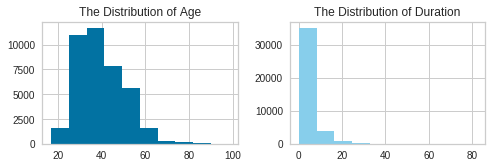

(40066, 22)


In [597]:
###################### 3.Explo
### 3.1 Visu
dist_age_duration = plt.figure(figsize = (7,2.5))

ra1 = dist_age_duration.add_subplot(1,2,1) 
#ra2 = dist_age_balance.add_subplot(1,2,2)
ra3 = dist_age_duration.add_subplot(1,2,2)

ra1.hist(dataset7['age'])
ra1.set_title('The Distribution of Age')

#ra2.hist(dataset7['balance'], color = 'skyblue')
#ra2.set_title('The Distribution of Balance')
ra3.hist(dataset7['duration'], color = 'skyblue')
ra3.set_title('The Distribution of Duration')

plt.tight_layout()

plt.savefig('Distrubution-age-duration')

plt.show()

print(dataset7.shape)

### age & durati

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


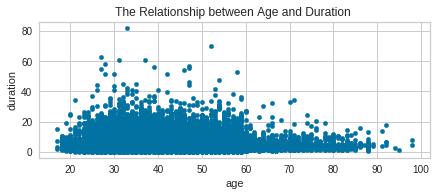

(40066, 22)


In [598]:
############################ 3.2 Visualize the relationship between 'age' and 'duration'¶

scatter_age_duration = dataset7.plot.scatter('age','duration',figsize = (7,2.5))

plt.title('The Relationship between Age and Duration ')

plt.show()


print(dataset7.shape)

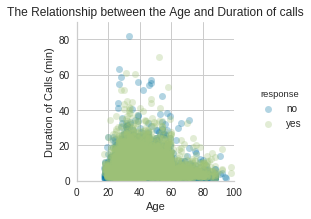

(40066, 22)


In [599]:
############### 
import seaborn as sns
dur_cam = sns.lmplot(x='age', y='duration',data = dataset7,
                     hue = 'response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.3}, height =3)

plt.axis([0,100,0,90])#x(age) y(s)
plt.ylabel('Duration of Calls (min)')
plt.xlabel('Age')
plt.title('The Relationship between the Age and Duration of calls')

# Annotation
#plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
#plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
#             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

print(dataset7.shape)

### RELA DURA & CAMP

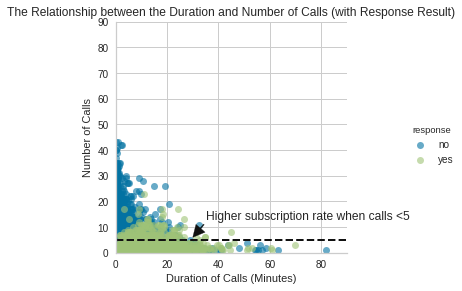

(40066, 22)


In [600]:
############### 3.4 Visualize the relationship between 'duration' & 'campaign': with response result¶
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = dataset7,
                     hue = 'response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =4)

plt.axis([0,90,0,90])
plt.ylabel('Number of Calls')#campaign
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Duration and Number of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))


save_fig('DataVisual-Durat_campaign')

plt.show()

print(dataset7.shape)


### Scatter Matrix

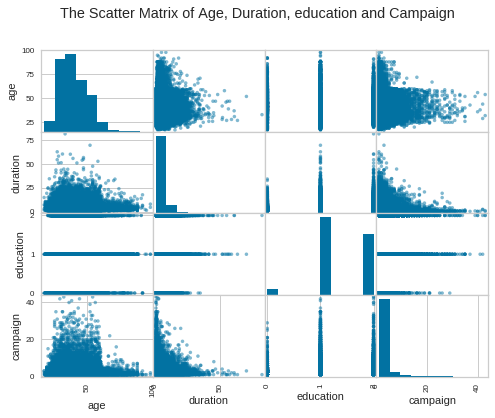

(40066, 22)


In [601]:
#Scattered Matrix
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(dataset7[['age','duration','education','campaign']],figsize=(8,6))

plt.suptitle('The Scatter Matrix of Age, Duration, education and Campaign')
plt.show()

print(dataset7.shape)

# ML

In [602]:

print(dataset7.shape)

display(dataset7.head())

(40066, 22)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,response_binary
0,56,housemaid,2,1,no,no,no,telephone,5,1,4.35,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,2,1,unknown,no,no,telephone,5,1,2.48,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,2,1,no,yes,no,telephone,5,1,3.77,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,2,1,no,no,no,telephone,5,1,2.52,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,2,1,no,no,yes,telephone,5,1,5.12,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


##Goal
 
The main objective of this project is to identify the most responsive customers before the marketing campaign so that the bank will be able to efficiently reach out to them, saving time and marketing resources. To achieve this objective, classification algorithms will be employed. By analyzing customer statistics, a classification model will be built to classify all clients into two groups: "yes" to term deposits and "no" to term deposits.

In [603]:
print(dataset7.shape)
display(dataset7.head(3))


(40066, 22)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,response_binary
0,56,housemaid,2,1,no,no,no,telephone,5,1,4.35,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,2,1,unknown,no,no,telephone,5,1,2.48,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,2,1,no,yes,no,telephone,5,1,3.77,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


## Housing, defa, loan to "#"

In [604]:
#dataset7 = pd.get_dummies(dataset7, columns = ['job'])
#dataset7 = pd.get_dummies(dataset7, columns = ['education'])
dataset7['housing'] = dataset7['housing'].map({'yes': 1, 'no': 0})
dataset7['default'] = dataset7['default'].map({'no': 1, 'unknown': 0})
dataset7['loan'] = dataset7['loan'].map({'yes': 1, 'no': 0})####################################################

#dataset7_response = pd.DataFrame(dataset['response_binary'])
#dataset7 = pd.merge(dataset7, dataset_response, left_index = True, right_index = True)
print(dataset7.shape)
display(dataset7.head(10))


(40066, 22)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,response_binary
0,56,housemaid,2,1,1.0,0,0,telephone,5,1,4.35,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,2,1,0.0,0,0,telephone,5,1,2.48,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,2,1,1.0,1,0,telephone,5,1,3.77,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,2,1,1.0,0,0,telephone,5,1,2.52,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,2,1,1.0,0,1,telephone,5,1,5.12,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
5,45,services,2,1,0.0,0,0,telephone,5,1,3.30,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
6,59,admin.,2,2,1.0,0,0,telephone,5,1,2.32,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
7,41,blue-collar,2,0,0.0,0,0,telephone,5,1,3.62,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
8,24,technician,0,2,1.0,1,0,telephone,5,1,6.33,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
9,25,services,0,1,1.0,1,0,telephone,5,1,0.83,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


## Contact to "#"

In [605]:
#To Create a colum for each var
#dataset7 = pd.get_dummies(dataset7, columns = ['job'])
#dataset7 = pd.get_dummies(dataset7, columns = ['education'])

dataset7['contact'] = dataset7['contact'].map({'telephone': 1, 'cellular': 0})
#dataset7['default'] = dataset7['default'].map({'no': 1, 'unknown': 0})
#dataset7['loan'] = dataset7['loan'].map({'yes': 1, 'no': 0})

#dataset7_response = pd.DataFrame(dataset['response_binary'])
#dataset7 = pd.merge(dataset7, dataset_response, left_index = True, right_index = True)
display(dataset7.head(10))

print(dataset7.shape)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,response_binary
0,56,housemaid,2,1,1.0,0,0,1,5,1,4.35,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,2,1,0.0,0,0,1,5,1,2.48,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,2,1,1.0,1,0,1,5,1,3.77,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,2,1,1.0,0,0,1,5,1,2.52,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,2,1,1.0,0,1,1,5,1,5.12,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
5,45,services,2,1,0.0,0,0,1,5,1,3.30,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
6,59,admin.,2,2,1.0,0,0,1,5,1,2.32,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
7,41,blue-collar,2,0,0.0,0,0,1,5,1,3.62,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
8,24,technician,0,2,1.0,1,0,1,5,1,6.33,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
9,25,services,0,1,1.0,1,0,1,5,1,0.83,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


(40066, 22)


### CORRELATION Matrix

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,response_binary
0,56,housemaid,2,1,1.0,0,0,1,5,1,4.35,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


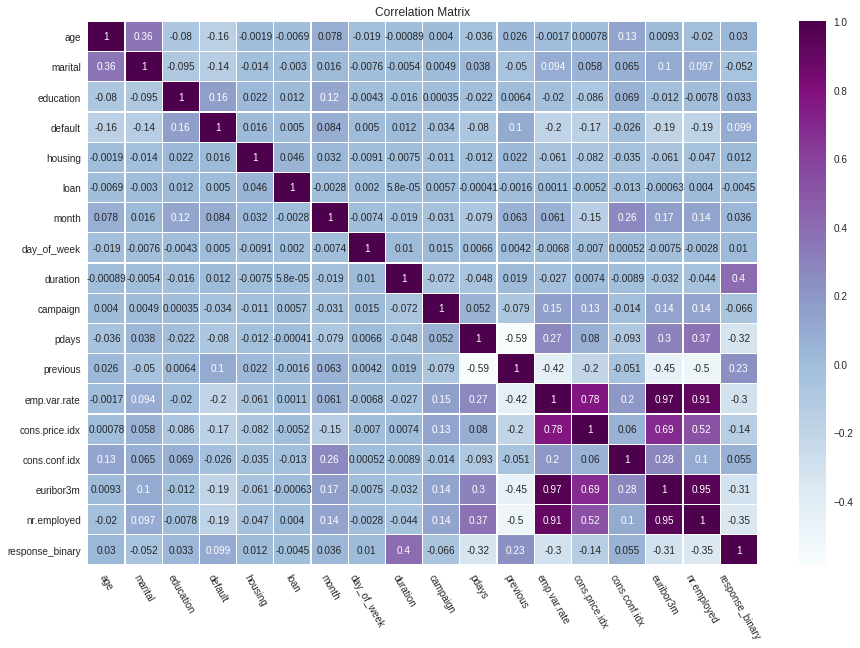

(40066, 22)


In [606]:
display(dataset7.head(1))
corr_data = dataset7[['age','job','marital','education','default','housing','loan','month','day_of_week','duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','response_binary']]
corr = corr_data.corr()
#housing	loan	contact	month	day_of_week	duration	campaign	pdays	previous	
#poutcome	emp.var.rate	cons.price.idx	cons.conf.idx	euribor3m	nr.employed	
cor_plot = sns.heatmap(corr,annot=True,cmap='BuPu',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.xticks(fontsize=10,rotation=-60)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')

save_fig('Datav-CORREMat')

plt.show()

print(dataset7.shape)



# Modelling

"https://www.kaggle.com/suhasshastry/bank-marketing-analysis-for-term-deposit/notebook"

Given data set is highly imbalanced, i.e. number of data belonging to 'no' category is way higher than 'yes' category.

### X & y

print("____sataset7 shape")
print(dataset7.shape)
predictors = dataset7.iloc[:,0:20]#21 response #22 response binary
#predictors = predictors.drop(['pdays'],axis=1)
Y = dataset7.iloc[:,21] #reponse binary
X = pd.get_dummies(predictors)
print("____predictors shape")
print(predictors.shape)
print("____y shape")
print(y.shape)
print("____table predictors")
display(predictors.head(300))
print("____y show")
display(y.head(3))

## orig data

In [607]:
#linkname = '../input/bank_cleaned.csv'
#dataset = read_csv(linkname)
#dataset = dataset.drop(['Unnamed: 0'], axis=1)

print("--1--data")
linkname = 'bank-additional-full.csv'
print("--1.2-read file")
datasetO = pd.read_csv(linkname, sep = ';')
print("--1.2.2--readed")
print(datasetO.shape)
display(datasetO.head(1))


################
# Step 1: Delete the rows which column 'poutcome' contains 'other'
conditionO = datasetO.poutcome == 'other'
datasetconditionO0 = datasetO.drop(datasetO[conditionO].index, axis = 0, inplace = False)

conditionO0 = datasetconditionO0.marital == 'unknown'
datasetO02 = datasetconditionO0.drop(datasetconditionO0[conditionO0].index, axis = 0, inplace = False)

conditionO00 = datasetO02.housing == 'unknown'
datasetO002 = datasetO02.drop(datasetO02[conditionO00].index, axis = 0, inplace = False)

conditionO000 = datasetO002.loan == 'unknown'
datasetO0002 = datasetO002.drop(datasetO002[conditionO000].index, axis = 0, inplace = False)

# We found out an "unknown" in edu
conditionO0000 = datasetO0002.education == 'unknown'
datasetO5 = datasetO0002.drop(datasetO0002[conditionO0000].index, axis = 0, inplace = False)

#erase calls with duration 0
#condition000 = dataset002.loan == 'unknown'
#dataset2 = dataset002.drop(dataset002[condition000].index, axis = 0, inplace = False)

print(datasetO5.shape)
display(datasetO5.head(1))

#datasetO5.rename(index=str, columns={'y': 'response'}, inplace = True)

#def convert(datasetO5, new_column, old_column):
#    datasetO5[new_column] = datasetO5[old_column].apply(lambda x: 0 if x == 'no' else 1)
#    return datasetO5[new_column].value_counts()
#To appreciate the change when displaying the table 22 col
#convert(datasetO5, "response_binary", "response")
#convert(dataset5, "response", "response")
#print("-----2.3.1")

#print(datasetO5.shape)
#display(datasetO5.head(1))




--1--data
--1.2-read file
--1.2.2--readed
(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


(38437, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [608]:
datasetO5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38437 entries, 0 to 41187
Data columns (total 21 columns):
age               38437 non-null int64
job               38437 non-null object
marital           38437 non-null object
education         38437 non-null object
default           38437 non-null object
housing           38437 non-null object
loan              38437 non-null object
contact           38437 non-null object
month             38437 non-null object
day_of_week       38437 non-null object
duration          38437 non-null int64
campaign          38437 non-null int64
pdays             38437 non-null int64
previous          38437 non-null int64
poutcome          38437 non-null object
emp.var.rate      38437 non-null float64
cons.price.idx    38437 non-null float64
cons.conf.idx     38437 non-null float64
euribor3m         38437 non-null float64
nr.employed       38437 non-null float64
y                 38437 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [609]:
predictors = datasetO5.iloc[:,0:20] 
predictors = predictors.drop(['pdays'],axis=1)

y = datasetO5.iloc[:,20]
X = pd.get_dummies(predictors)
print(datasetO5.shape)
display(datasetO5.head())

print(predictors.shape)
display(predictors.head())

display(y.head())
display(X.head())

(38437, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


(38437, 19)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_unknown,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


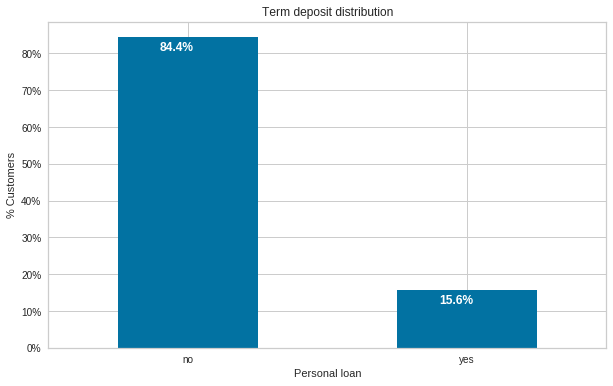

In [610]:
from pylab import rcParams
import matplotlib.ticker as mtick # For specifying the axes tick format 

df = datasetO5 

rcParams['figure.figsize']=10,6

ax = (df['loan'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers with loan')
ax.set_xlabel('Personal loan')
ax.set_ylabel('% Customers')
ax.set_title('Term deposit distribution')

totals = []  # creating a list to collect the plt.patches data

# finding the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)  # setting individual bar lables using above list

for i in ax.patches:
    # getting_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%', color='white', weight = 'bold')
    


In [611]:
pd.Series(y).value_counts()

no     34160
yes     4277
Name: y, dtype: int64

In [0]:
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
#print("libraries")

## Dta split

In [0]:
# 20% of the data will be used for testing
#test_size= 0.20
#seed = 7
#X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=test_size, random_state=seed)
#print("____data splited")

## Compare dif clas algor

In [0]:
# Time for Classification Models
import time

from sklearn.decomposition import PCA
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

dict_classifiers = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=5000),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(gamma = 'auto'),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        classifier.fit(X_train, Y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [617]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 5.60 s
trained Nearest Neighbors in 0.31 s
trained Linear SVM in 159.79 s
trained Gradient Boosting Classifier in 5.82 s
trained Decision Tree in 0.27 s
trained Random Forest in 0.59 s
trained Neural Net in 6.35 s
trained Naive Bayes in 0.07 s
                     classifier  train_score  training_time
4                 Decision Tree     1.000000       0.266150
5                 Random Forest     0.997510       0.588621
2                    Linear SVM     0.958038     159.793320
1             Nearest Neighbors     0.929678       0.308423
3  Gradient Boosting Classifier     0.924438       5.815561
0           Logistic Regression     0.912990       5.595267
6                    Neural Net     0.865230       6.349941
7                   Naive Bayes     0.860472       0.070996


In [0]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC(gamma='auto')
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [619]:
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
4,Grad B CLF,0.917599
0,Logistic Reg.,0.911280
5,Rand FC,0.909496
2,KNN,0.901171
1,SVC,0.894258
3,Dec Tree,0.888831
6,Neural Classifier,0.887197
7,Naives Bayes,0.887197


In [620]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()


from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(grad_clf, X_train, y_train, cv=5)

from sklearn.metrics import accuracy_score

grad_clf.fit(X_train, y_train)
print ("Gradient Boost Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))
predicted_probas =grad_clf.predict_proba(X_test)

Gradient Boost Classifier accuracy is 0.92


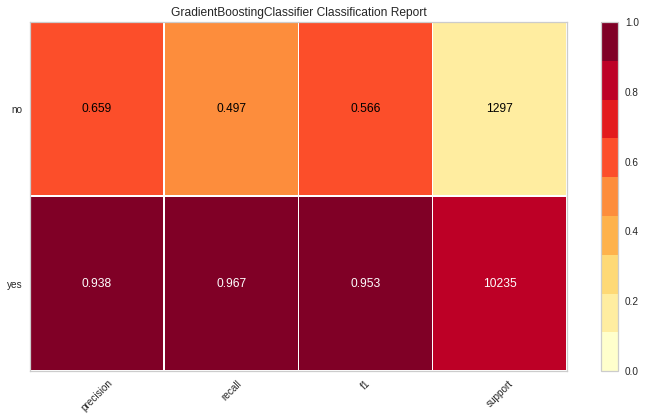

In [621]:
from yellowbrick.classifier import ClassificationReport

# Specify the target classes
classes = ["yes", "no"]

visualizer = ClassificationReport(grad_clf, classes=classes, support=True, force_model=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Draw/show/poof the data

In [622]:
from sklearn.metrics import classification_report
y_pred = grad_clf.predict(X_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

          no       0.94      0.97      0.95     10235
         yes       0.66      0.50      0.57      1297

    accuracy                           0.91     11532
   macro avg       0.80      0.73      0.76     11532
weighted avg       0.91      0.91      0.91     11532



In [623]:
accuracy_score(y_test,y_pred)

0.9144987859868193

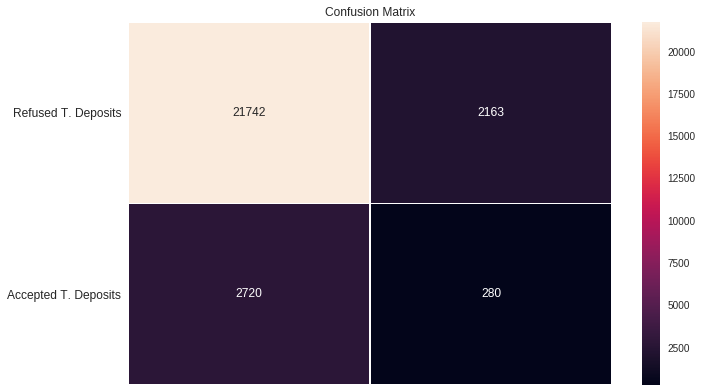

In [570]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=12)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=12, rotation=360)
plt.show()

In [0]:
import sklearn.metrics
import pandas as pd

def calc_cumulative_gains(df: pd.DataFrame, actual_col: str, predicted_col:str, probability_col:str):
  df.sort_values(by=probability_col, ascending=False, inplace=True)

  subset = df[df[predicted_col] == True]

  rows = []
  for group in np.array_split(subset, 10):
    score = sklearn.metrics.accuracy_score(group[actual_col].tolist(),
                                               group[predicted_col].tolist(),
                                               normalize=False)

    rows.append({'NumCases': len(group), 'NumCorrectPredictions': score})

  lift = pd.DataFrame(rows)
  print("done")


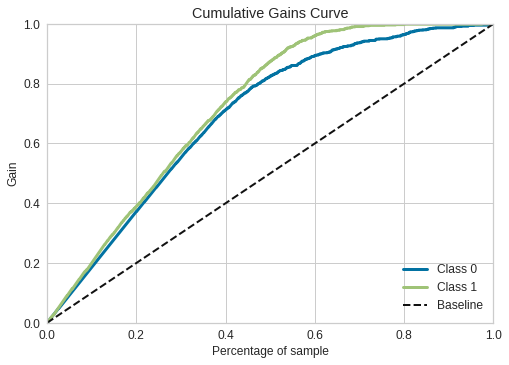

In [0]:
from scikitplot.metrics import plot_lift_curve
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

In [553]:
y_scores = cross_val_predict(grad_clf, X_train, y_train, cv=5, method="decision_function")
# hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
y_scores.shape

(26905,)

In [0]:
import sklearn.metrics
import pandas as pd

def calc_cumulative_gains(df: pd.DataFrame, actual_col: str, predicted_col:str, probability_col:str):
  df.sort_values(by=probability_col, ascending=False, inplace=True)

  subset = df[df[predicted_col] == True]

  rows = []
  for group in np.array_split(subset, 10):
    score = sklearn.metrics.accuracy_score(group[actual_col].tolist(),
                                               group[predicted_col].tolist(),
                                               normalize=False)

    rows.append({'NumCases': len(group), 'NumCorrectPredictions': score})

  lift = pd.DataFrame(rows)
  print("done")


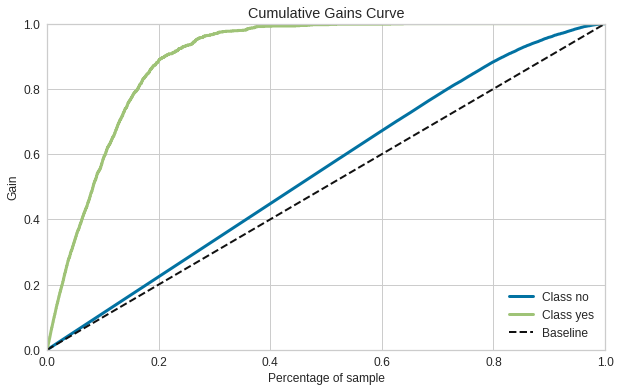

In [558]:
from scikitplot.metrics import plot_lift_curve
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

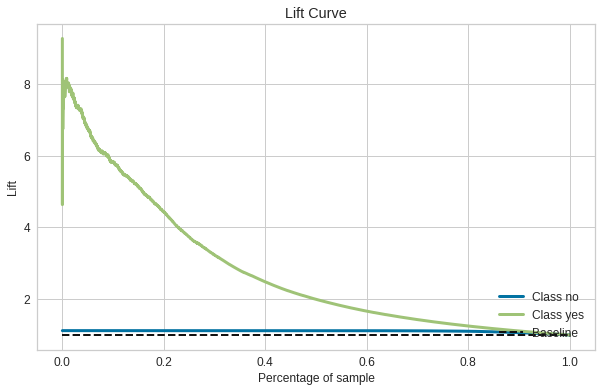

In [559]:
skplt.metrics.plot_lift_curve(y_test, predicted_probas, title='Lift Curve', ax=None, ﬁgsize=None, title_fontsize='large', text_fontsize='medium') 

In [624]:
#term_deposits.info()
#display(term_deposits.head(1))
#df = df.rename(columns={'deposit':'y', 'day': 'day_of_week'})

#predictors = term_deposits.iloc[:,1:16] 
#predictors = predictors.drop(['pdays'],axis=1)

#y = term_deposits.iloc[:,0]
#X = pd.get_dummies(predictors)
#print(term_deposits.shape)
#display(term_deposits.head())
#print(predictors.shape)
#display(predictors.head())
#display(y.head())
#display(X.head())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import classification_report

# Logistic Regression
#log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
#log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
#log_reg_mean = log_scores.mean()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = lm.LogisticRegression(random_state=0, solver='lbfgs',multi_class='auto',max_iter=1000).fit(X_train,y_train)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]
y_test = label_binarize(y_test,classes=['no','yes'])
fpr_imb, tpr_imb, _ = roc_curve(y_test, y_pred)
roc_auc_imb = auc(fpr_imb, tpr_imb)
y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Log Reg -")
#print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))
print(classification_report(y_test,y_pred,digits=2))

#  clf=svm.SVC(probability=True)
#svc_clf = SVC(gamma='auto')
#svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
#svc_mean = svc_scores.mean()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = SVC(probability=True).fit(X_train,y_train)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]
y_test = label_binarize(y_test,classes=['no','yes'])
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred)
roc_auc_svc = auc(fpr_svc, tpr_svc)
y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("SVC -")
#print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
#print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))
print(classification_report(y_test,y_pred,digits=2))

# KNearestNeighbors
#knn_clf = KNeighborsClassifier()
#knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
#knn_mean = knn_scores.mean()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = KNeighborsClassifier().fit(X_train,y_train)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]
y_test = label_binarize(y_test,classes=['no','yes'])
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred)
roc_auc_knn = auc(fpr_knn, tpr_knn)
y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("KNN -")
#print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
#print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))
print(classification_report(y_test,y_pred,digits=2))

# Decision Tree
#tree_clf = tree.DecisionTreeClassifier()
#tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
#tree_mean = tree_scores.mean()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = tree.DecisionTreeClassifier().fit(X_train,y_train)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]
y_test = label_binarize(y_test,classes=['no','yes'])
fpr_DT, tpr_DT, _ = roc_curve(y_test, y_pred)
roc_auc_DT = auc(fpr_DT, tpr_DT)
y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("DT -")
#print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
#print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))
print(classification_report(y_test,y_pred,digits=2))

# Gradient Boosting Classifier
#grad_clf = GradientBoostingClassifier()
#grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
#grad_mean = grad_scores.mean()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = GradientBoostingClassifier().fit(X_train,y_train)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]
y_test = label_binarize(y_test,classes=['no','yes'])
fpr_GBC, tpr_GBC, _ = roc_curve(y_test, y_pred)
roc_auc_GBC = auc(fpr_GBC, tpr_GBC)
y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("GBC -")
#print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
#print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))
print(classification_report(y_test,y_pred,digits=2))

# Random Forest Classifier
#rand_clf = RandomForestClassifier(n_estimators=18)
#rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
#rand_mean = rand_scores.mean()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = RandomForestClassifier().fit(X_train,y_train)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]
y_test = label_binarize(y_test,classes=['no','yes'])
fpr_RFC, tpr_RFC, _ = roc_curve(y_test, y_pred)
roc_auc_RFC = auc(fpr_RFC, tpr_RFC)
y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("RFC -")
#print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
#print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))
print(classification_report(y_test,y_pred,digits=2))

# NeuralNet Classifier
#neural_clf = MLPClassifier(alpha=1)
#neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
#neural_mean = neural_scores.mean()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = MLPClassifier().fit(X_train,y_train)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]
y_test = label_binarize(y_test,classes=['no','yes'])
fpr_NN, tpr_NN, _ = roc_curve(y_test, y_pred)
roc_auc_NN = auc(fpr_NN, tpr_NN)
y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("NN -")
#print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
#print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))
print(classification_report(y_test,y_pred,digits=2))

# Naives Bayes
#nav_clf = GaussianNB()
#nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
#nav_mean = neural_scores.mean()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = GaussianNB().fit(X_train,y_train)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]
y_test = label_binarize(y_test,classes=['no','yes'])
fpr_GNB, tpr_GNB, _ = roc_curve(y_test, y_pred)
roc_auc_GNB = auc(fpr_GNB, tpr_GNB)
y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("GNB -")
#print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
#print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))
print(classification_report(y_test,y_pred,digits=2))


Log Reg -
Accuracy:  0.91
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10266
           1       0.65      0.40      0.50      1266

    accuracy                           0.91     11532
   macro avg       0.79      0.69      0.72     11532
weighted avg       0.90      0.91      0.90     11532

SVC -
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     10295
           1       0.62      0.06      0.12      1237

    accuracy                           0.90     11532
   macro avg       0.76      0.53      0.53     11532
weighted avg       0.87      0.90      0.86     11532

KNN -
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10275
           1       0.56      0.47      0.51      1257

    accuracy                           0.90     11532
   macro avg       0.75      0.71      0.73     11532
weighted avg       0.90      0.90   

++4


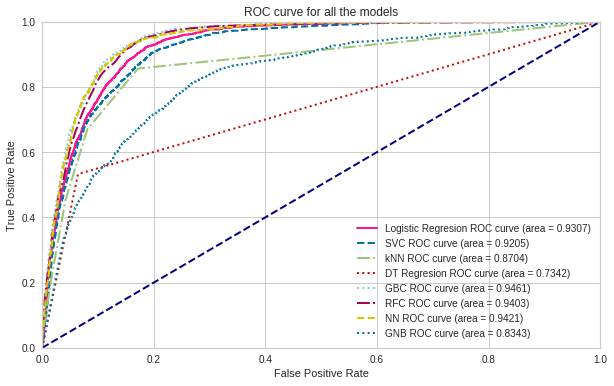

In [442]:
plt.figure()
lw = 2
plt.plot(fpr_imb, tpr_imb,
         label='Logistic Regresion ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_imb),
         color='deeppink', linestyle='-', linewidth=2)

plt.plot(fpr_svc, tpr_svc,
         label='SVC ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_svc),
         color='b', linestyle='--', linewidth=2)

plt.plot(fpr_knn, tpr_knn,
         label='kNN ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_knn),
         color='g', linestyle='-.', linewidth=2)

plt.plot(fpr_DT, tpr_DT,
         label='DT Regresion ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_DT),
         color='r', linestyle=':', linewidth=2)

plt.plot(fpr_GBC, tpr_GBC,
         label='GBC ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_GBC),
         color='c', linestyle=':', linewidth=2)

plt.plot(fpr_RFC, tpr_RFC,
         label='RFC ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_RFC),
         color='m', linestyle='-.', linewidth=2)

plt.plot(fpr_NN, tpr_NN,
         label='NN ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_NN),
         color='y', linestyle='--', linewidth=2)

plt.plot(fpr_GNB, tpr_GNB,
         label='GNB ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_GNB),
         color='b', linestyle='dotted', linewidth=2)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for all the models')
plt.legend(loc="lower right")

print("++4")
save_fig('roc-ALL')

plt.show()




In [347]:
print("More analysis")

More analysis


In [372]:
from yellowbrick.classifier import ClassificationReport

# Specify the target classes
classes = ["yes", "no"]

visualizer = ClassificationReport(grad_clf, classes=classes, support=True, force_model=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)#,score="binary", pos_label="neg")        # Evaluate the model on the test data##############recall_average = recall_score(Y_test, y_predict, average="binary", pos_label="neg")

visualizer.poof()                       # Draw/show/poof the data

TypeError: ignored

In [388]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
classes = (["yes", "no"])
print('Precision Score: ', precision_score(y_train, y_train_pred,))
print('Recall Score: ', recall_score(y_train, y_train_pred))

ValueError: ignored

In [357]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)


ValueError: ignored

In [358]:
y_scores = grad_clf.decision_function([some_instance])
y_scores

NameError: ignored

In [359]:
y_scores = cross_val_predict(grad_clf, X_train, y_train, cv=5, method="decision_function")
# hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
y_scores.shape

(26905,)

ValueError: ignored

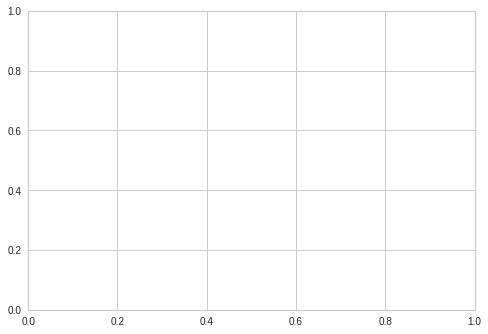

In [360]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(grad_clf)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.poof()           # Draw/show/poof the data

TypeError: ignored

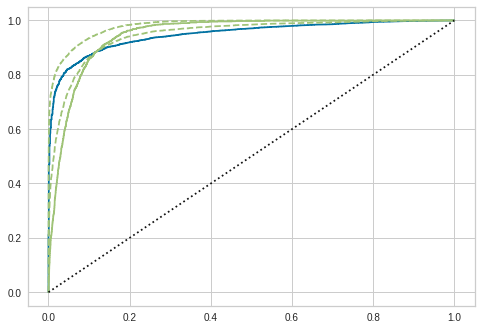

In [361]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(grad_clf, classes=["yes", "no"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)# Evaluate the model on the test data
plt.annotate('ROC Score of 92% \n', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(shrink=0.05),
            )
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(shrink=0.05),
                )
visualizer.poof()                       # Draw/show/poof the data

In [362]:
cutoff_prob = threshold[(np.abs(recalls - 0.6)).argmin()]
round( float( cutoff_prob ), 2 )

NameError: ignored

In [363]:
# How can we decide which threshold to use? We want to return the scores instead of predictions with this code.
from sklearn.metrics import precision_recall_curve
precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(10,6))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=12)
    plt.ylabel("Level of Precision and Recall", fontsize=12)
    plt.xlabel("Thresholds", fontsize=12)
    plt.legend(loc="best", fontsize=12)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.13, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.12 \n threshold ', xy=(0.13, 0.83), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='k')
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()

ValueError: ignored

In [364]:
cutoff_prob = threshold[(np.abs(recalls - 0.6)).argmin()]
round( float( cutoff_prob ), 2 )

NameError: ignored

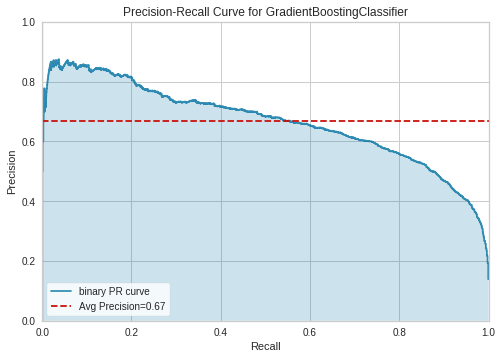

In [365]:
from yellowbrick.classifier import PrecisionRecallCurve

# Create the visualizer, fit, score, and poof it
viz = PrecisionRecallCurve(GradientBoostingClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

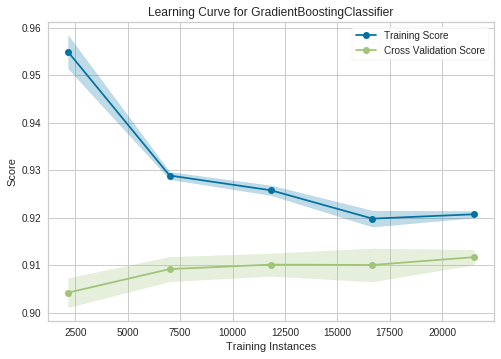

In [366]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    grad_clf, scoring='f1_weighted', cv=5)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.poof()           # Draw/show/poof the data

In [367]:
pip install scikit-plot 

In [0]:
import sklearn.metrics
import pandas as pd

def calc_cumulative_gains(df: pd.DataFrame, actual_col: str, predicted_col:str, probability_col:str):
  df.sort_values(by=probability_col, ascending=False, inplace=True)

  subset = df[df[predicted_col] == True]

  rows = []
  for group in np.array_split(subset, 10):
    score = sklearn.metrics.accuracy_score(group[actual_col].tolist(),
                                               group[predicted_col].tolist(),
                                               normalize=False)

    rows.append({'NumCases': len(group), 'NumCorrectPredictions': score})

  lift = pd.DataFrame(rows)
  print("done")


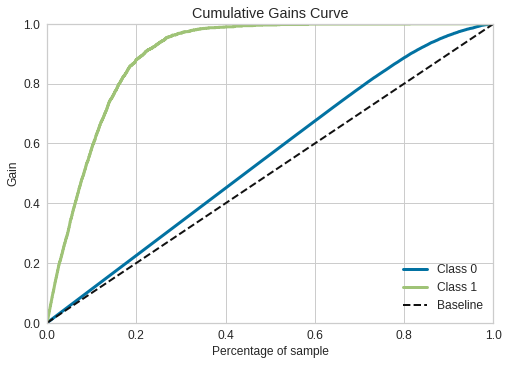

In [370]:
from scikitplot.metrics import plot_lift_curve
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

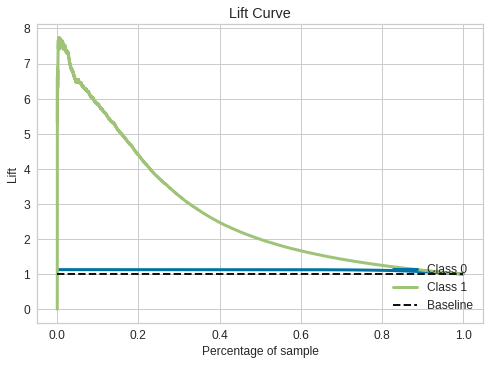

In [371]:
skplt.metrics.plot_lift_curve(y_test, predicted_probas, title='Lift Curve', ax=None, ﬁgsize=None, title_fontsize='large', text_fontsize='medium') 

#**Imbalance data**

In [235]:
y.value_counts()

no     34160
yes     4277
Name: y, dtype: int64

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_Usampled, y_Usampled = rus.fit_resample(X, y)
pd.Series(y_Usampled).value_counts()

yes    4277
no     4277
dtype: int64

In [238]:
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)
pd.Series(y_SMOTE).value_counts()

yes    34160
no     34160
dtype: int64

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
perp_model = lm.Perceptron().fit(X_train_std,y_train)
y_pred = perp_model.predict(X_test_std)
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))

Accuracy:  0.89


In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
sc = StandardScaler()
sc.fit(X_SMOTE)
X_train_std = sc.transform(X_SMOTE)
X_test_std = sc.transform(X_test)
perp_model = lm.Perceptron().fit(X_train_std,y_SMOTE)
y_pred = perp_model.predict(X_test_std)
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))
mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",mat)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Accuracy:  0.8
Confusion Matrix: 
 [[8133 2079]
 [ 188 1132]]
Precision:  0.35 Recall:  0.86


In [242]:
mat = confusion_matrix(y_test,y_pred)#,labels=['no','yes'])
print(mat)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

[[8133 2079]
 [ 188 1132]]
Precision:  0.0 Recall:  0.0


In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
model = tree.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Precision:  0.61 Recall:  0.59


In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
model = tree.fit(X_SMOTE,y_SMOTE)
y_pred = model.predict(X_test)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Precision:  0.46 Recall:  0.81


In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
forest = RandomForestClassifier(n_estimators= 1000,criterion="gini", max_depth=5,min_samples_split = 0.4,min_samples_leaf=1, class_weight="balanced")
model = forest.fit(X_train,y_train)
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts()
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Precision:  0.28 Recall:  0.71


In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
forest = RandomForestClassifier(n_estimators= 1000,criterion="gini", max_depth=5,min_samples_split = 0.4,min_samples_leaf=1, class_weight="balanced")
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
model = forest.fit(X_SMOTE,y_SMOTE)
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts()
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Precision:  0.32 Recall:  0.69


In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = lm.LogisticRegression(random_state=0, solver='lbfgs',multi_class='auto',max_iter=1000).fit(X_train,y_train)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]
y_test = label_binarize(y_test,classes=['no','yes'])
fpr_imb, tpr_imb, _ = roc_curve(y_test, y_pred)
roc_auc_imb = auc(fpr_imb, tpr_imb)
y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Imbalanced -")
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
# Undersampled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rus = RandomUnderSampler(random_state=0)
X_Usampled, y_Usampled = rus.fit_resample(X_train, y_train)
model = lm.LogisticRegression(random_state=0, solver='lbfgs',multi_class='auto',max_iter=5000).fit(X_Usampled,y_Usampled)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]
y_test = label_binarize(y_test,classes=['no','yes'])
fpr_us, tpr_us, _ = roc_curve(y_test, y_pred)
roc_auc_us = auc(fpr_us, tpr_us)
y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Random undersampled -")
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
# Oversampled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ros = RandomOverSampler(random_state=0)
X_Osampled, y_Osampled = ros.fit_resample(X_train, y_train)
model = lm.LogisticRegression(random_state=0, solver='lbfgs',multi_class='auto',max_iter=5000).fit(X_Osampled, y_Osampled)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]
y_test = label_binarize(y_test,classes=['no','yes'])
fpr_os, tpr_os, _ = roc_curve(y_test, y_pred)
roc_auc_os = auc(fpr_os, tpr_os)
y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Random oversampled -")
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
# SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
model = lm.LogisticRegression(random_state=0, solver='lbfgs',multi_class='auto',max_iter=5000).fit(X_SMOTE,y_SMOTE)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]
y_test = label_binarize(y_test,classes=['no','yes'])
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_pred)
roc_auc_smote = auc(fpr_smote, tpr_smote)
y_pred = model.predict(X_test)
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("SMOTE -")
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Imbalanced -
Precision:  0.67 Recall:  0.41
Random undersampled -
Precision:  0.43 Recall:  0.86
Random oversampled -
Precision:  0.44 Recall:  0.88
SMOTE -
Precision:  0.42 Recall:  0.87


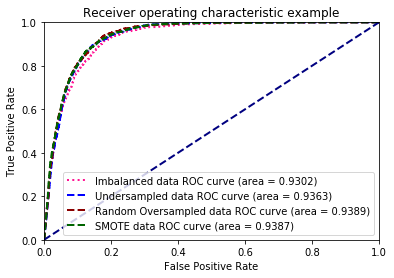

In [51]:
plt.figure()
lw = 2
plt.plot(fpr_imb, tpr_imb,
         label='Imbalanced data ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_imb),
         color='deeppink', linestyle=':', linewidth=2)

plt.plot(fpr_us, tpr_us,
         label='Undersampled data ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_us),
         color='blue', linestyle='--', linewidth=2)

plt.plot(fpr_os, tpr_os,
         label='Random Oversampled data ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_os),
         color='darkred', linestyle='--', linewidth=2)

plt.plot(fpr_smote, tpr_smote,
         label='SMOTE data ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_smote),
         color='darkgreen', linestyle='--', linewidth=2)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [52]:
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3)
svm = SVC(kernel='linear')
model = svm.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Linear kernel- ","Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_pred)
roc_auc_linear = auc(fpr_linear, tpr_linear)
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3)
svm = SVC(kernel='rbf')
model = svm.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Guassian kernel- ","Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_pred)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

Linear kernel-  Precision:  0.89 Recall:  0.73
Guassian kernel-  Precision:  0.83 Recall:  0.87
